 ## PROJECT-2 PROPOSAL 
The main dataset I have chosen to analyze is from the website https://ourworldindata.org/grapher/number-of-deaths-by-risk-factor .The data tells number of deaths caused by risk factors (behavioral, environmental, metabolic risks etc.) for countries between 1990-2017. The data is 4.1MB and has 6469 rows and 38 columns. I’ll also get help to support my hypotheses from additional datasets which are from official website of The World Bank https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups and https://data.worldbank.org/indicator/SP.POP.TOTL show the countries income levels and population by years. The income data is 287KB, has 229 rows and 34 columns.The population data is 176KB,has 264 rows and 65 columns  Both of them are free and legal to access. I've used the terms “dataset for death rates, world population dataset, income levels dataset” to reach to data sources. After my exploring, I didn't find any cleanup on the data. I'll primarily observe if there is a relation between the death rates and income levels try to answer hypotheses at the following.


 I’d like to pose the following hypotheses;
1.	Death rates from obesity in the US are x10 greater than in Ethiopia between 1990-2017 since the US is a high-income country.
### **YES**
2.	Number of deaths by drug use in the US is increased by between 3-5% per year from 2009 through 2017.
### **NO**

In [1]:
#import the libraries 
import pandas as pd
import requests
import io
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#Get the list of all files and directories in current working directory
l = os.listdir(os.getcwd())

l = [i for i in l] 
l

['PROJECT2.ipynb',
 'number-of-deaths-by-risk-factor.csv',
 '.DS_Store',
 'worldpopulation.csv',
 '.ipynb_checkpoints',
 'OGHIST-2.xls',
 'PROJECT2.PROPOSAL.docx']

>Loading data frames from csv and xls files.

In [3]:
df = pd.read_csv('number-of-deaths-by-risk-factor.csv') #number of deaths
df2=pd.read_csv('worldpopulation.csv', skiprows=3) #world population
df3 = pd.read_excel('OGHIST-2.xls',sheet_name=2).iloc[6:-2,1:] #income levels


> I'll merge all the dataframe into a single dataframe.

In [4]:
#Let's see how the dataframes look like
df.head()  #it shows countries deaths number by risk factor between 1990-2017

,Entity,Code,Year,Unsafe water source (deaths),Poor sanitation (deaths),No access to handwashing facility (deaths),Indoor air pollution (deaths),Non-exclusive breastfeeding (deaths),Discontinued breastfeeding (deaths),Child wasting (deaths),...,Air pollution (outdoor & indoor) (deaths),Outdoor air pollution (deaths),Diet low in fiber (deaths),Diet high in sodium (deaths),Diet low in legumes (deaths),Diet low in calcium (deaths),Diet high in red meat (deaths),Diet low in whole grains (deaths),Diet low in nuts and seeds (deaths),Diet low in seafood omega-3 fatty acids (deaths)
0,Afghanistan,AFG,1990,7554.049543,5887.747628,5412.314513,22388.497233,3221.138842,156.097553,22778.849249,...,26598.006727,4383.83,2864.234512,2737.197934,3418.965194,181.287701,0.220484,11381.377345,7299.867330,6456.565238
1,Afghanistan,AFG,1991,7359.676749,5732.770160,5287.891103,22128.758206,3150.559597,151.539851,22292.691113,...,26379.532218,4426.36,2974.479775,2741.184956,3457.398250,184.251584,0.184714,11487.832390,7386.764303,6511.344276
2,Afghanistan,AFG,1992,7650.437822,5954.804987,5506.657363,22873.768789,3331.349048,156.609194,23102.197940,...,27263.127914,4568.91,3168.591633,2798.560245,3586.490291,191.318450,0.151354,11866.235572,7640.628526,6703.095594
3,Afghanistan,AFG,1993,10270.731383,7986.736613,7104.620351,25599.756284,4477.006100,206.834451,27902.669960,...,30495.561499,5080.29,3401.045056,2853.301679,3746.266658,199.767293,0.109392,12335.961682,7968.311853,6946.196824
4,Afghanistan,AFG,1994,11409.177112,8863.010065,8051.515953,28013.167200,5102.622054,233.930571,32929.005932,...,33323.161401,5499.23,3599.709735,2880.025765,3869.288402,206.619714,0.059103,12672.950191,8244.368430,7138.030745


In [5]:
df2.head() #Second data shows world population between 1960-2019

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN


In [6]:
df3.head() #income levels

,Bank's fiscal year:,FY89,FY90,FY91,FY92,FY93,FY94,FY95,FY96,FY97,...,FY11,FY12,FY13,FY14,FY15,FY16,FY17,FY18,FY19,FY20
6,Afghanistan,L,L,L,L,L,L,L,L,L,...,L,L,L,L,L,L,L,L,L,L
7,Albania,..,..,..,LM,LM,LM,L,L,L,...,UM,UM,LM,UM,UM,UM,UM,UM,UM,UM
8,Algeria,UM,UM,LM,LM,LM,LM,LM,LM,LM,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM
9,American Samoa,H,H,H,UM,UM,UM,UM,UM,UM,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM
10,Andorra,..,..,..,H,H,H,H,H,H,...,H,H,H,H,H,H,H,H,H,H


In [7]:
#For the first and third dataframe, change the 'Entity' and 'Bank's fiscal year'  columns name to 'Country Name'
df=df.rename(columns={"Entity":"Country Name"})
df3=df3.rename(columns={"Bank's fiscal year:":"Country Name"})

In [8]:
#see the full summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 38 columns):
Country Name                                        6468 non-null object
Code                                                5488 non-null object
Year                                                6468 non-null int64
Unsafe water source (deaths)                        6468 non-null float64
Poor sanitation (deaths)                            6468 non-null float64
No access to handwashing facility (deaths)          6468 non-null float64
Indoor air pollution (deaths)                       6468 non-null float64
Non-exclusive breastfeeding (deaths)                6468 non-null float64
Discontinued breastfeeding (deaths)                 6468 non-null float64
Child wasting (deaths)                              6468 non-null float64
Child stunting (deaths)                             6468 non-null float64
Low birth weight (deaths)                           6468 non-null float64
Secondhan

>The data looks pretty clean. "Code" and "High cholesterol (deaths)" column have some missing values and "Outdoor air pollution (deaths)" columns has one missing value.

>Let's look at the second dataframe

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              260 non-null float64
1961              260 non-null float64
1962              260 non-null float64
1963              260 non-null float64
1964              260 non-null float64
1965              260 non-null float64
1966              260 non-null float64
1967              260 non-null float64
1968              260 non-null float64
1969              260 non-null float64
1970              260 non-null float64
1971              260 non-null float64
1972              260 non-null float64
1973              260 non-null float64
1974              260 non-null float64
1975              260 non-null float64
1976              260 non-null float64
1977              260 non-null float64
1978              260 non-null float64
19

>Dataframe has 2 empty columns (2019, Unnamed:64) and some missing values. 


>First, drop the empty columns and the columns we don't need. We need just the population between 1990-2017 from this dataframe

In [10]:
df2=df2.drop(['Country Code','Indicator Name','Indicator Code','Unnamed: 64','2019'],axis=1)
df2.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0
1,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,...,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0
2,Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,...,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0


>The dataframe needs to be tidy. We can get all the years columns into a single 'Year' column.

In [11]:
df2_tidy = pd.melt(df2,['Country Name'], var_name="Year", value_name="Population")
df2_tidy.head()

,Country Name,Year,Population
0,Aruba,1960,54211.0
1,Afghanistan,1960,8996973.0
2,Angola,1960,5454933.0
3,Albania,1960,1608800.0
4,Andorra,1960,13411.0


> We need the years between 1990-2017

In [12]:
#First,convert data types to integer
df2_tidy['Year'] = df2_tidy['Year'].astype(int)
df2_tidy['Population']=df2_tidy['Population'].astype('Int64')
df2_tidy.head()

,Country Name,Year,Population
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [13]:
#mask the other years
start_year=1990
end_year=2017
mask = (df2_tidy['Year'] >= start_year) & (df2_tidy['Year'] <= end_year)
df2_population = df2_tidy.loc[mask]
df2_population.head()

,Country Name,Year,Population
7920,Aruba,1990,62149
7921,Afghanistan,1990,12412308
7922,Angola,1990,11848386
7923,Albania,1990,3286542
7924,Andorra,1990,54509


In [14]:
#get the info
df2_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7392 entries, 7920 to 15311
Data columns (total 3 columns):
Country Name    7392 non-null object
Year            7392 non-null int64
Population      7347 non-null Int64
dtypes: Int64(1), int64(1), object(1)
memory usage: 238.2+ KB


In [15]:
#see which rows have missing values in population column
df2_miss = df2_population[df2_population.isna().any(axis=1)]


In [16]:
#see if the entire population column is emtpy
df2_population.isnull().sum()==df2_population.shape[0]

Country Name    False
Year            False
Population      False
dtype: bool

> Let's look at the last dataframe before merge the dataframes

>Bank's fiscal year FY89 shows calender date 1987 for the data.

In [17]:
#change the columns year format range the calender date
cols = list(range(1987,2019))
cols.insert(0,'Country Name')
df3.columns = cols
df3.head()

,Country Name,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6,Afghanistan,L,L,L,L,L,L,L,L,L,...,L,L,L,L,L,L,L,L,L,L
7,Albania,..,..,..,LM,LM,LM,L,L,L,...,UM,UM,LM,UM,UM,UM,UM,UM,UM,UM
8,Algeria,UM,UM,LM,LM,LM,LM,LM,LM,LM,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM
9,American Samoa,H,H,H,UM,UM,UM,UM,UM,UM,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM
10,Andorra,..,..,..,H,H,H,H,H,H,...,H,H,H,H,H,H,H,H,H,H


We need the years between 1990-2017, so we can drop extra columns.

In [18]:
df3.drop(df3[[1987,1988,1989,2018]],axis=1,inplace=True)

In [19]:
#Make the data tidy
df3_income = pd.melt(df3,["Country Name"], var_name="Year", value_name="Income Level")
df3_income.head()

,Country Name,Year,Income Level
0,Afghanistan,1990,L
1,Albania,1990,LM
2,Algeria,1990,LM
3,American Samoa,1990,UM
4,Andorra,1990,H


>  Now, the dataframes are ready to merge. 2 hypotheses of my project are based on the first dataframe. I cleaned up other 2 dataframes to make ready to merge. They have the data between 1990-2017 I need countries income levels and population to support and answer my hypotheses.

> I'd like to keep only rows that match from the dataframes,so use the 'inner' type of merge. I'd like to analyze the countries that have all values.

In [20]:
#Merge the dataframe with population dataframe
df_merge1= pd.merge(df,df2_population, how= 'inner',on=['Year','Country Name'])
df_merge1.head()

,Country Name,Code,Year,Unsafe water source (deaths),Poor sanitation (deaths),No access to handwashing facility (deaths),Indoor air pollution (deaths),Non-exclusive breastfeeding (deaths),Discontinued breastfeeding (deaths),Child wasting (deaths),...,Outdoor air pollution (deaths),Diet low in fiber (deaths),Diet high in sodium (deaths),Diet low in legumes (deaths),Diet low in calcium (deaths),Diet high in red meat (deaths),Diet low in whole grains (deaths),Diet low in nuts and seeds (deaths),Diet low in seafood omega-3 fatty acids (deaths),Population
0,Afghanistan,AFG,1990,7554.049543,5887.747628,5412.314513,22388.497233,3221.138842,156.097553,22778.849249,...,4383.83,2864.234512,2737.197934,3418.965194,181.287701,0.220484,11381.377345,7299.867330,6456.565238,12412308
1,Afghanistan,AFG,1991,7359.676749,5732.770160,5287.891103,22128.758206,3150.559597,151.539851,22292.691113,...,4426.36,2974.479775,2741.184956,3457.398250,184.251584,0.184714,11487.832390,7386.764303,6511.344276,13299017
2,Afghanistan,AFG,1992,7650.437822,5954.804987,5506.657363,22873.768789,3331.349048,156.609194,23102.197940,...,4568.91,3168.591633,2798.560245,3586.490291,191.318450,0.151354,11866.235572,7640.628526,6703.095594,14485546
3,Afghanistan,AFG,1993,10270.731383,7986.736613,7104.620351,25599.756284,4477.006100,206.834451,27902.669960,...,5080.29,3401.045056,2853.301679,3746.266658,199.767293,0.109392,12335.961682,7968.311853,6946.196824,15816603
4,Afghanistan,AFG,1994,11409.177112,8863.010065,8051.515953,28013.167200,5102.622054,233.930571,32929.005932,...,5499.23,3599.709735,2880.025765,3869.288402,206.619714,0.059103,12672.950191,8244.368430,7138.030745,17075727


In [21]:
#Merge the income dataframe
final_merge = pd.merge(df_merge1,df3_income,how='inner',on=['Year','Country Name'])
final_merge.head()

,Country Name,Code,Year,Unsafe water source (deaths),Poor sanitation (deaths),No access to handwashing facility (deaths),Indoor air pollution (deaths),Non-exclusive breastfeeding (deaths),Discontinued breastfeeding (deaths),Child wasting (deaths),...,Diet low in fiber (deaths),Diet high in sodium (deaths),Diet low in legumes (deaths),Diet low in calcium (deaths),Diet high in red meat (deaths),Diet low in whole grains (deaths),Diet low in nuts and seeds (deaths),Diet low in seafood omega-3 fatty acids (deaths),Population,Income Level
0,Afghanistan,AFG,1990,7554.049543,5887.747628,5412.314513,22388.497233,3221.138842,156.097553,22778.849249,...,2864.234512,2737.197934,3418.965194,181.287701,0.220484,11381.377345,7299.867330,6456.565238,12412308,L
1,Afghanistan,AFG,1991,7359.676749,5732.770160,5287.891103,22128.758206,3150.559597,151.539851,22292.691113,...,2974.479775,2741.184956,3457.398250,184.251584,0.184714,11487.832390,7386.764303,6511.344276,13299017,L
2,Afghanistan,AFG,1992,7650.437822,5954.804987,5506.657363,22873.768789,3331.349048,156.609194,23102.197940,...,3168.591633,2798.560245,3586.490291,191.318450,0.151354,11866.235572,7640.628526,6703.095594,14485546,L
3,Afghanistan,AFG,1993,10270.731383,7986.736613,7104.620351,25599.756284,4477.006100,206.834451,27902.669960,...,3401.045056,2853.301679,3746.266658,199.767293,0.109392,12335.961682,7968.311853,6946.196824,15816603,L
4,Afghanistan,AFG,1994,11409.177112,8863.010065,8051.515953,28013.167200,5102.622054,233.930571,32929.005932,...,3599.709735,2880.025765,3869.288402,206.619714,0.059103,12672.950191,8244.368430,7138.030745,17075727,L


In [22]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4676 entries, 0 to 4675
Data columns (total 40 columns):
Country Name                                        4676 non-null object
Code                                                4676 non-null object
Year                                                4676 non-null object
Unsafe water source (deaths)                        4676 non-null float64
Poor sanitation (deaths)                            4676 non-null float64
No access to handwashing facility (deaths)          4676 non-null float64
Indoor air pollution (deaths)                       4676 non-null float64
Non-exclusive breastfeeding (deaths)                4676 non-null float64
Discontinued breastfeeding (deaths)                 4676 non-null float64
Child wasting (deaths)                              4676 non-null float64
Child stunting (deaths)                             4676 non-null float64
Low birth weight (deaths)                           4676 non-null float64
Secondha

> High cholesterol (deaths) and Population columns have missing values

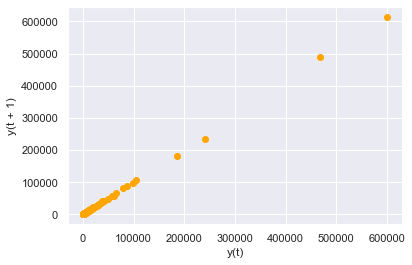

In [23]:
#Create a lag plot to see if the order of this data matters 
pd.plotting.lag_plot(final_merge['High cholesterol (deaths)'],c='orange')


> the order of the data matters, then interpolate the missing values

In [24]:
#interpolate the missing values
final_merge['High cholesterol (deaths)']= final_merge['High cholesterol (deaths)'].interpolate()


In [25]:
final_merge.isnull().sum() #count the number of missing values per column

Country Name                                        0
Code                                                0
Year                                                0
Unsafe water source (deaths)                        0
Poor sanitation (deaths)                            0
No access to handwashing facility (deaths)          0
Indoor air pollution (deaths)                       0
Non-exclusive breastfeeding (deaths)                0
Discontinued breastfeeding (deaths)                 0
Child wasting (deaths)                              0
Child stunting (deaths)                             0
Low birth weight (deaths)                           0
Secondhand smoke (deaths)                           0
Alcohol use (deaths)                                0
Drug use (deaths)                                   0
Diet low in fruits (deaths)                         0
Diet low in vegetables (deaths)                     0
Unsafe sex (deaths)                                 0
Low physical activity (death

In [26]:
print(final_merge[final_merge['Population'].isnull()])

     Country Name Code  Year  Unsafe water source (deaths)  \
1394      Eritrea  ERI  2012                   3581.853298   
1395      Eritrea  ERI  2013                   3465.415153   
1396      Eritrea  ERI  2014                   3313.592043   
1397      Eritrea  ERI  2015                   3205.932760   
1398      Eritrea  ERI  2016                   3101.228625   
1399      Eritrea  ERI  2017                   3083.705694   
2326       Kuwait  KWT  1992                      4.316834   
2327       Kuwait  KWT  1993                      3.646394   
2328       Kuwait  KWT  1994                      4.333171   

      Poor sanitation (deaths)  No access to handwashing facility (deaths)  \
1394               2784.066992                                 2552.316702   
1395               2690.941303                                 2474.038373   
1396               2571.105440                                 2376.506643   
1397               2484.583783                                 2294

In [27]:
#fill the place with value in the previous respectively.
final_merge['Population']=final_merge['Population'].fillna(method='bfill') 
final_merge.head()

,Country Name,Code,Year,Unsafe water source (deaths),Poor sanitation (deaths),No access to handwashing facility (deaths),Indoor air pollution (deaths),Non-exclusive breastfeeding (deaths),Discontinued breastfeeding (deaths),Child wasting (deaths),...,Diet low in fiber (deaths),Diet high in sodium (deaths),Diet low in legumes (deaths),Diet low in calcium (deaths),Diet high in red meat (deaths),Diet low in whole grains (deaths),Diet low in nuts and seeds (deaths),Diet low in seafood omega-3 fatty acids (deaths),Population,Income Level
0,Afghanistan,AFG,1990,7554.049543,5887.747628,5412.314513,22388.497233,3221.138842,156.097553,22778.849249,...,2864.234512,2737.197934,3418.965194,181.287701,0.220484,11381.377345,7299.867330,6456.565238,12412308,L
1,Afghanistan,AFG,1991,7359.676749,5732.770160,5287.891103,22128.758206,3150.559597,151.539851,22292.691113,...,2974.479775,2741.184956,3457.398250,184.251584,0.184714,11487.832390,7386.764303,6511.344276,13299017,L
2,Afghanistan,AFG,1992,7650.437822,5954.804987,5506.657363,22873.768789,3331.349048,156.609194,23102.197940,...,3168.591633,2798.560245,3586.490291,191.318450,0.151354,11866.235572,7640.628526,6703.095594,14485546,L
3,Afghanistan,AFG,1993,10270.731383,7986.736613,7104.620351,25599.756284,4477.006100,206.834451,27902.669960,...,3401.045056,2853.301679,3746.266658,199.767293,0.109392,12335.961682,7968.311853,6946.196824,15816603,L
4,Afghanistan,AFG,1994,11409.177112,8863.010065,8051.515953,28013.167200,5102.622054,233.930571,32929.005932,...,3599.709735,2880.025765,3869.288402,206.619714,0.059103,12672.950191,8244.368430,7138.030745,17075727,L


> ### Values of risk factor are number of deaths for each year. We need to calculate death rate. Death Rate shows number of deaths per 100,000 population.

In [28]:
df_final=final_merge.copy()
cols=df_final.columns.tolist()

In [29]:
new_cols=cols[3:38] #choose the columns that have risk factors

In [30]:
#Calculate the death rate with loop
for i in new_cols:
    df_final[i]=(df_final[i]/df_final['Population'])*100000
df_final.head()    

,Country Name,Code,Year,Unsafe water source (deaths),Poor sanitation (deaths),No access to handwashing facility (deaths),Indoor air pollution (deaths),Non-exclusive breastfeeding (deaths),Discontinued breastfeeding (deaths),Child wasting (deaths),...,Diet low in fiber (deaths),Diet high in sodium (deaths),Diet low in legumes (deaths),Diet low in calcium (deaths),Diet high in red meat (deaths),Diet low in whole grains (deaths),Diet low in nuts and seeds (deaths),Diet low in seafood omega-3 fatty acids (deaths),Population,Income Level
0,Afghanistan,AFG,1990,60.859347,47.434753,43.604417,180.373362,25.951168,1.257603,183.518241,...,23.075761,22.052288,27.544959,1.460548,0.001776,91.694287,58.811523,52.017443,12412308,L
1,Afghanistan,AFG,1991,55.340006,43.106721,39.761518,166.393939,23.690169,1.139482,167.626608,...,22.366163,20.611937,25.997397,1.385453,0.001389,86.381064,55.543686,48.961094,13299017,L
2,Afghanistan,AFG,1992,52.814287,41.108599,38.014842,157.907536,22.997746,1.081141,159.484482,...,21.874161,19.319674,24.759096,1.320754,0.001045,81.917765,52.746569,46.274373,14485546,L
3,Afghanistan,AFG,1993,64.936392,50.495904,44.918750,161.853694,28.305737,1.307705,176.413797,...,21.503006,18.039915,23.685659,1.263023,0.000692,77.993749,50.379414,43.917122,15816603,L
4,Afghanistan,AFG,1994,66.815176,51.904145,47.151819,164.052560,29.882312,1.369960,192.841019,...,21.080858,16.866197,22.659582,1.210020,0.000346,74.216168,48.281215,41.802207,17075727,L


> Change the death rate to integer

In [31]:
cols = [col for col in df_final.columns if col not in ['Country Name', 'Code',
                                                           'Population','Income Level']]
for col in cols:
    df_final[col] = df_final[col].astype(int)

In [32]:
df_final.head()

,Country Name,Code,Year,Unsafe water source (deaths),Poor sanitation (deaths),No access to handwashing facility (deaths),Indoor air pollution (deaths),Non-exclusive breastfeeding (deaths),Discontinued breastfeeding (deaths),Child wasting (deaths),...,Diet low in fiber (deaths),Diet high in sodium (deaths),Diet low in legumes (deaths),Diet low in calcium (deaths),Diet high in red meat (deaths),Diet low in whole grains (deaths),Diet low in nuts and seeds (deaths),Diet low in seafood omega-3 fatty acids (deaths),Population,Income Level
0,Afghanistan,AFG,1990,60,47,43,180,25,1,183,...,23,22,27,1,0,91,58,52,12412308,L
1,Afghanistan,AFG,1991,55,43,39,166,23,1,167,...,22,20,25,1,0,86,55,48,13299017,L
2,Afghanistan,AFG,1992,52,41,38,157,22,1,159,...,21,19,24,1,0,81,52,46,14485546,L
3,Afghanistan,AFG,1993,64,50,44,161,28,1,176,...,21,18,23,1,0,77,50,43,15816603,L
4,Afghanistan,AFG,1994,66,51,47,164,29,1,192,...,21,16,22,1,0,74,48,41,17075727,L


> ### So, the final dataframe has all data I'll work on it. The dataframe has number of deaths,income levels and population for each country between 1990-2017. I merged 3 dataframes, changed the name of some columns,worked on some missing values, converted to datatypes.The variable names are descriptive. I changed the values type of some columns which show the number of deaths by risk factor. They shows death rate now.

> ### Before answering my hypotheses, I'd like to analyze the relation between the death rates by risk factor and income levels.
### 'Income Level' columns have 4 different descriptions;
* Low income (L)
* Lower middle income (LM)
* Upper middle income (UM)
* High income (H)

In [33]:
df_anlyz = df_final.copy()
deaths = df_anlyz.iloc[:,3:-2] #display the columns which have number of deaths by risk factor.
deaths.head()

,Unsafe water source (deaths),Poor sanitation (deaths),No access to handwashing facility (deaths),Indoor air pollution (deaths),Non-exclusive breastfeeding (deaths),Discontinued breastfeeding (deaths),Child wasting (deaths),Child stunting (deaths),Low birth weight (deaths),Secondhand smoke (deaths),...,Air pollution (outdoor & indoor) (deaths),Outdoor air pollution (deaths),Diet low in fiber (deaths),Diet high in sodium (deaths),Diet low in legumes (deaths),Diet low in calcium (deaths),Diet high in red meat (deaths),Diet low in whole grains (deaths),Diet low in nuts and seeds (deaths),Diet low in seafood omega-3 fatty acids (deaths)
0,60,47,43,180,25,1,183,83,98,34,...,214,35,23,22,27,1,0,91,58,52
1,55,43,39,166,23,1,167,77,92,31,...,198,33,22,20,25,1,0,86,55,48
2,52,41,38,157,22,1,159,73,92,30,...,188,31,21,19,24,1,0,81,52,46
3,64,50,44,161,28,1,176,77,116,30,...,192,32,21,18,23,1,0,77,50,43
4,66,51,47,164,29,1,192,83,116,30,...,195,32,21,16,22,1,0,74,48,41


In [34]:
#calculate the total deaths number and create 'Total Deaths Number' columns
deaths.loc[:,'Total Death Rate'] = deaths.sum(axis=1) 
deaths.loc[:,'Income Level'] = df_anlyz['Income Level'] 
deaths.loc[:,'Year'] = df_anlyz['Year']
deaths = deaths[deaths['Income Level']!='..'] 
deaths.describe()

,Unsafe water source (deaths),Poor sanitation (deaths),No access to handwashing facility (deaths),Indoor air pollution (deaths),Non-exclusive breastfeeding (deaths),Discontinued breastfeeding (deaths),Child wasting (deaths),Child stunting (deaths),Low birth weight (deaths),Secondhand smoke (deaths),...,Diet low in fiber (deaths),Diet high in sodium (deaths),Diet low in legumes (deaths),Diet low in calcium (deaths),Diet high in red meat (deaths),Diet low in whole grains (deaths),Diet low in nuts and seeds (deaths),Diet low in seafood omega-3 fatty acids (deaths),Total Death Rate,Year
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,...,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,25.860996,19.505547,17.169023,31.469219,5.374592,0.211007,42.144877,10.449641,25.226017,14.956493,...,11.353491,29.644768,9.419186,1.775071,0.140091,43.457690,29.688492,19.917120,1087.705678,2003.632804
std,46.209781,35.739743,30.982391,36.024291,9.911850,0.616237,78.256426,22.459990,28.133115,9.391811,...,9.538486,32.275572,12.031320,1.957858,0.377737,32.695542,23.625044,16.503431,889.803070,8.046673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,137.000000,1990.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000,...,5.000000,10.000000,2.000000,0.000000,0.000000,22.000000,15.000000,9.000000,705.000000,1997.000000
50%,2.000000,1.000000,2.000000,18.000000,1.000000,0.000000,6.000000,0.000000,14.000000,12.000000,...,9.000000,19.000000,5.000000,1.000000,0.000000,33.000000,22.000000,14.000000,945.000000,2004.000000
75%,34.000000,25.000000,21.000000,50.000000,6.000000,0.000000,45.000000,9.000000,39.000000,20.000000,...,15.000000,35.000000,12.000000,3.000000,0.000000,54.000000,36.000000,24.000000,1286.000000,2011.000000
max,343.000000,269.000000,219.000000,185.000000,75.000000,5.000000,633.000000,230.000000,156.000000,57.000000,...,55.000000,306.000000,70.000000,11.000000,2.000000,214.000000,164.000000,119.000000,45513.000000,2017.000000


> ### Create a line plot of total deaths number over time. Each line shows the different income levels countries death number

(500, 3000)

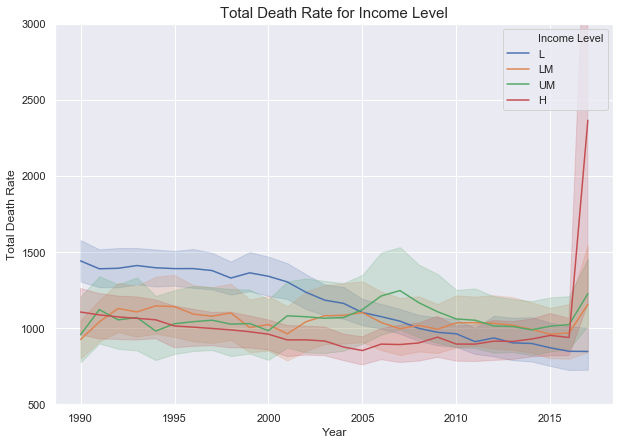

In [55]:
#create a line plot of total deaths number over years
fig = plt.figure(figsize=(10,7))
#specify the column value for the hue parameter
sns.lineplot(x='Year',y='Total Death Rate',data=deaths,hue='Income Level') 
plt.title('Total Death Rate for Income Level',fontsize=15)
plt.ylim(500,3000)

> ### It looks like low income countries have more deaths than high income countries. However, the plot shows the numbers are decreasing for low income countries but incresing for high income countries by year

> ### I'd like plot a pie chart to see % share of total death number for income levels

In [36]:
group = deaths.groupby(['Income Level']).sum() #group by income levels

In [37]:
group = group.reset_index()
group

,Income Level,Unsafe water source (deaths),Poor sanitation (deaths),No access to handwashing facility (deaths),Indoor air pollution (deaths),Non-exclusive breastfeeding (deaths),Discontinued breastfeeding (deaths),Child wasting (deaths),Child stunting (deaths),Low birth weight (deaths),...,Diet low in fiber (deaths),Diet high in sodium (deaths),Diet low in legumes (deaths),Diet low in calcium (deaths),Diet high in red meat (deaths),Diet low in whole grains (deaths),Diet low in nuts and seeds (deaths),Diet low in seafood omega-3 fatty acids (deaths),Total Death Rate,Year
0,H,216,95,214,1725,37,0,629,33,3102,...,17044,33223,13906,3899,547,50444,36382,21859,1171826,2309905
1,L,95523,73546,64493,92077,19663,823,156365,41302,73283,...,7926,19932,5263,632,0,35381,22461,17490,1479908,2456307
2,LM,18953,13335,11307,39450,4165,127,30846,6035,28928,...,14591,43420,13970,1411,4,64031,43212,30520,1310398,2497238
3,UM,4191,2691,2912,11412,842,20,5900,667,10651,...,12631,39702,10161,2218,93,49919,34423,21690,1038051,1947250


In [38]:
labels = list(group['Income Level'])
sizes = list(group['Total Death Rate']/(1e5))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

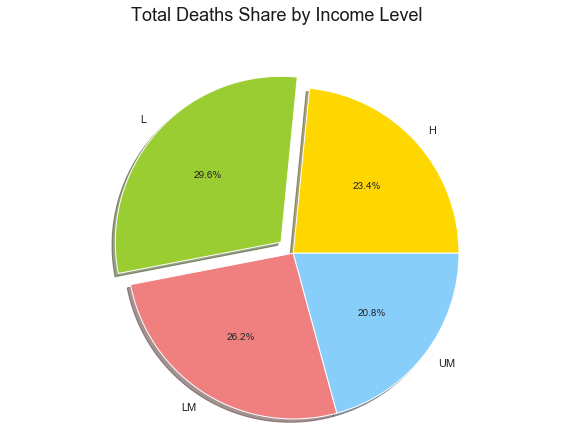

In [39]:
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Total Deaths Share by Income Level',color='k',fontsize=18)
plt.show()

> ### Pie chart shows that low income countries have most death and lower medium income countries follows it.

> ### Finally, I'd like to plot the numbers for all risk factors over the years.

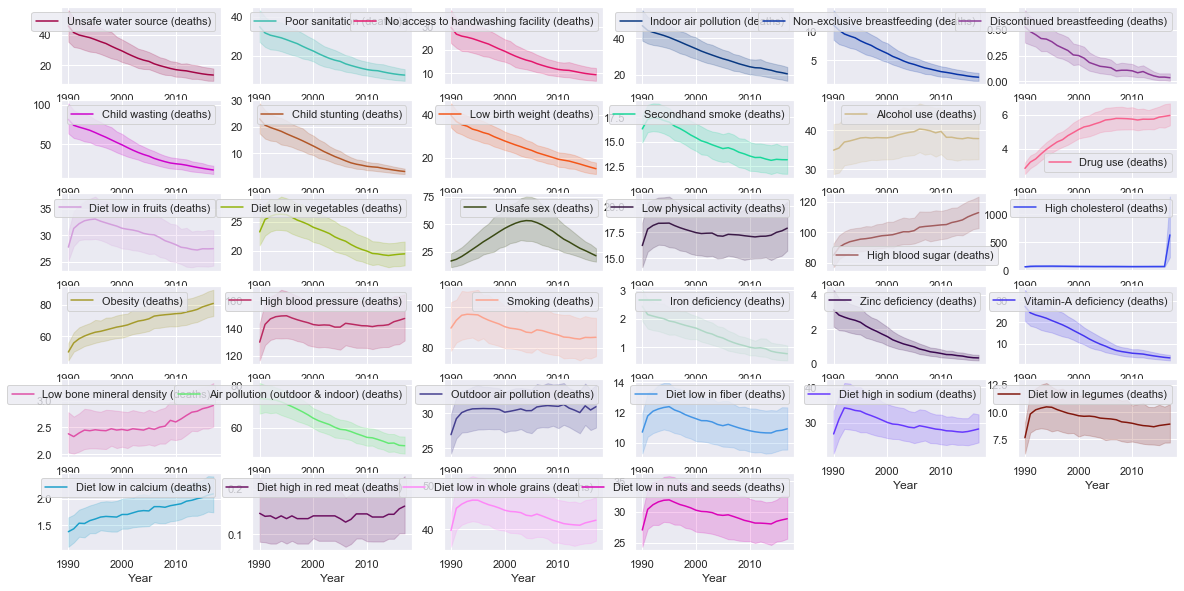

In [40]:
features = list(df_anlyz.iloc[:,3:-3])
f,axs = plt.subplots(6,6,figsize=(20,10))
axes = axs.flatten().tolist()
axes = axes[:-2]
import random
random.seed(42)
colors = []
for i in range(len(axes)):
    x=random.uniform(0, 1)
    y=random.uniform(0, 1)
    z=random.uniform(0, 1)
    colors.append((x,y,z))
for i,j in enumerate(axes):
    sns.lineplot(x='Year',y=features[i],data=deaths,ax=j,label=features[i],color=colors[i])
    j.grid(True)
    j.set_ylabel('') 
axs[5,4].set_axis_off()
axs[5,5].set_axis_off()
fig.subplots_adjust(wspace=0.5,hspace=0.5)
fig.tight_layout()

> ### Looks like, while the death rate from some risk factors are increasing some of them are decreasing. Clearly, we cant'say that numbers from all behavioral risks are increasing or decreasing by years. For example while the numbers for smoking are increasing the numbers for drug use are increasing. However, the deaths rate from environmental risks (air pollution, unsafe water source etc.) are decreasing around the world by years.

# ***
## **HYPOTHESIS 1.** 
**Death rates from obesity in the US are x10 or greater than in Ethiopia between 1990-2017 since the US is a high-income country.**
# ***

In [41]:
final_copy=df_final.copy()
final_copy.head()

,Country Name,Code,Year,Unsafe water source (deaths),Poor sanitation (deaths),No access to handwashing facility (deaths),Indoor air pollution (deaths),Non-exclusive breastfeeding (deaths),Discontinued breastfeeding (deaths),Child wasting (deaths),...,Diet low in fiber (deaths),Diet high in sodium (deaths),Diet low in legumes (deaths),Diet low in calcium (deaths),Diet high in red meat (deaths),Diet low in whole grains (deaths),Diet low in nuts and seeds (deaths),Diet low in seafood omega-3 fatty acids (deaths),Population,Income Level
0,Afghanistan,AFG,1990,60,47,43,180,25,1,183,...,23,22,27,1,0,91,58,52,12412308,L
1,Afghanistan,AFG,1991,55,43,39,166,23,1,167,...,22,20,25,1,0,86,55,48,13299017,L
2,Afghanistan,AFG,1992,52,41,38,157,22,1,159,...,21,19,24,1,0,81,52,46,14485546,L
3,Afghanistan,AFG,1993,64,50,44,161,28,1,176,...,21,18,23,1,0,77,50,43,15816603,L
4,Afghanistan,AFG,1994,66,51,47,164,29,1,192,...,21,16,22,1,0,74,48,41,17075727,L


In [42]:
#display the columns we need
final_copy.set_index(['Country Name','Year'], inplace=True)
eth_usa=final_copy.loc[['Ethiopia','United States'],['Population','Obesity (deaths)','Income Level']]
eth_usa.head()

Population  Obesity (deaths) Income Level
Country Name Year                                           
Ethiopia     1990    47887865                10            L
             1991    49609969                10            L
             1992    51423585                10            L
             1993    53295566                10            L
             1994    55180998                10            L

> As we can see, while Ethiopia's income level is low, United State's income level is high

> We need to calculate the ratio of death rate in Usa to death rate in Ethiopia

In [43]:
eth = eth_usa.reset_index()[eth_usa.reset_index()['Country Name'].str.startswith('E')]
usa = eth_usa.reset_index()[eth_usa.reset_index()['Country Name'].str.startswith('U')]
eth_usa_last=pd.merge(eth,usa,on='Year')
eth_usa_last.head()

,Country Name_x,Year,Population_x,Obesity (deaths)_x,Income Level_x,Country Name_y,Population_y,Obesity (deaths)_y,Income Level_y
0,Ethiopia,1990,47887865,10,L,United States,249623000,102,H
1,Ethiopia,1991,49609969,10,L,United States,252981000,102,H
2,Ethiopia,1992,51423585,10,L,United States,256514000,101,H
3,Ethiopia,1993,53295566,10,L,United States,259919000,104,H
4,Ethiopia,1994,55180998,10,L,United States,263126000,105,H


In [44]:
#Calculation the ratio and see the result in a new column 
eth_usa_last['Ratio'] = (eth_usa_last['Obesity (deaths)_y'] / eth_usa_last['Obesity (deaths)_x']).astype(int)

In [45]:
eth_usa_last

,Country Name_x,Year,Population_x,Obesity (deaths)_x,Income Level_x,Country Name_y,Population_y,Obesity (deaths)_y,Income Level_y,Ratio
0,Ethiopia,1990,47887865,10,L,United States,249623000,102,H,10
1,Ethiopia,1991,49609969,10,L,United States,252981000,102,H,10
2,Ethiopia,1992,51423585,10,L,United States,256514000,101,H,10
3,Ethiopia,1993,53295566,10,L,United States,259919000,104,H,10
4,Ethiopia,1994,55180998,10,L,United States,263126000,105,H,10
5,Ethiopia,1995,57047908,9,L,United States,266278000,107,H,11
6,Ethiopia,1996,58883530,9,L,United States,269394000,107,H,11
7,Ethiopia,1997,60697443,9,L,United States,272657000,107,H,11
8,Ethiopia,1998,62507724,9,L,United States,275854000,108,H,12
9,Ethiopia,1999,64343013,9,L,United States,279040000,110,H,12


In [46]:
eth_usa_last.describe()

,Year,Population_x,Obesity (deaths)_x,Population_y,Obesity (deaths)_y,Ratio
count,28.000000,2.800000e+01,28.000000,2.800000e+01,28.000000,28.000000
mean,2003.500000,7.465357e+07,8.857143,2.902584e+08,111.071429,12.214286
std,8.225975,1.758114e+07,0.755929,2.303835e+07,5.843189,1.397276
min,1990.000000,4.788786e+07,8.000000,2.496230e+08,101.000000,10.000000
25%,1996.750000,6.024396e+07,8.000000,2.718412e+08,107.000000,11.000000
50%,2003.500000,7.320504e+07,9.000000,2.914566e+08,111.000000,12.000000
75%,2010.250000,8.826495e+07,9.000000,3.098896e+08,113.000000,13.000000
max,2017.000000,1.064000e+08,10.000000,3.251471e+08,125.000000,14.000000


> ### **As a result,the "Ratio" column shows that the min ratio is 10 and max is 14. Let's see the results on a bar plot**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

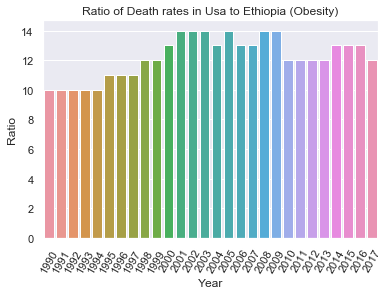

In [47]:
ax = sns.barplot(x="Year", y="Ratio", data=eth_usa_last)
plt.ylabel
plt.title('Ratio of Death rates in Usa to Ethiopia (Obesity)')
plt.xticks(rotation=60)

> ### I expected to see the death rates from obesity in USA x10 or greater than Ethiopia. The results on "Ratio" column and the bar plot make my hypothesis correct. According to my data and analyze, the answer of my hypothesis is **YES.**

# ***
# **HYPOTHESIS 2.**
**Number of deaths by drug use in the US is increased by between 3-5% per year from 2009 through 2017.**
# ***

In [48]:
finalcopy=df_final.copy()

In [49]:
finalcopy.set_index(["Country Name"], inplace=True)
usa_drugs=finalcopy.loc[['United States'],['Year' ,'Population','Drug use (deaths)']]
strt=2009
usa_drugs=usa_drugs.loc[(usa_drugs["Year"] >= strt)] #display the year 2009 and after
usa_drugs

,Year,Population,Drug use (deaths)
Country Name,,,
United States,2009,306771529,19
United States,2010,309326085,20
United States,2011,311580009,21
United States,2012,313874218,22
United States,2013,316057727,24
United States,2014,318386421,26
United States,2015,320742673,28
United States,2016,323071342,31
United States,2017,325147121,32


> **I have death rate of drug use. Now, I can find out the percentage change between the years**

In [50]:
usa_drugs["Percentage of Difference"] = usa_drugs["Drug use (deaths)"].pct_change(axis=0,fill_method='bfill')*100
usa_drugs

,Year,Population,Drug use (deaths),Percentage of Difference
Country Name,,,,
United States,2009,306771529,19,NaN
United States,2010,309326085,20,5.263158
United States,2011,311580009,21,5.000000
United States,2012,313874218,22,4.761905
United States,2013,316057727,24,9.090909
United States,2014,318386421,26,8.333333
United States,2015,320742673,28,7.692308
United States,2016,323071342,31,10.714286
United States,2017,325147121,32,3.225806


In [51]:
#The first row contains NaN values, as there is no previous row from which we can calculate the change.
#the NaN values in the dataframe has been filled using fillna method.
usa_drugs=usa_drugs.fillna(0) 

In [52]:
usa_drugs['Percentage of Difference'] = usa_drugs['Percentage of Difference'].astype(int)

In [53]:
usa_drugs

,Year,Population,Drug use (deaths),Percentage of Difference
Country Name,,,,
United States,2009,306771529,19,0
United States,2010,309326085,20,5
United States,2011,311580009,21,5
United States,2012,313874218,22,4
United States,2013,316057727,24,9
United States,2014,318386421,26,8
United States,2015,320742673,28,7
United States,2016,323071342,31,10
United States,2017,325147121,32,3


In [54]:
#Generate descriptive statistics
usa_drugs.describe()

,Year,Population,Drug use (deaths),Percentage of Difference
count,9.000000,9.000000e+00,9.000000,9.000000
mean,2013.000000,3.161063e+08,24.777778,5.666667
std,2.738613,6.280170e+06,4.763869,3.162278
min,2009.000000,3.067715e+08,19.000000,0.000000
25%,2011.000000,3.115800e+08,21.000000,4.000000
50%,2013.000000,3.160577e+08,24.000000,5.000000
75%,2015.000000,3.207427e+08,28.000000,8.000000
max,2017.000000,3.251471e+08,32.000000,10.000000


> The mean of the percentage change between 2009-2017 is 5.66, but my hypothesis is posing the change of percentage by between 3-5% **per year.**

>  I expected to see the percentage of difference of death rates from drug in USA  between 3-5% per year.The results on "Percentage of difference" column and the bar plot show that my hypothesis is not correct. Death rate is only increased by between by 3-5% between 2009-2010,2010-2011,2011-2012 and 2016-2017. When we look at the max value of percentage of increase is 10% between 2015-2016 and the min value of percentage of increase is 3% between 2016-2017 According to my data and analyze, the answer of my hypothesis is **NO.**

# *Conclusion*

In summary, I analyzed the data about death numbers by different risk factors. My perspective was getting attention on income levels. If you live in a low income country, the risk factors would find you often and would be more dangerous because poor countries often lack the technology and resources to fight risk factors.The results and graphs show the lower income causes more death indeed.the  However, it is important to make a point of what the risk factor is. For example, we expect more deaths from Obesity in high income country. It could make more analysis on the data for each risk factors and the death rates to find detailed answers.I wanted to analyze the data with a general review based on income levels for this project.While working on this project, I learned how to plot different type graphs,how to mask values in a pandas dataframe based on condition. The project also helped me to improve my Python coding skills.
